# Using BigQuery to perform basic data analytics

Here is a notebook to execute some SQL commands in order to analyse and then visualise data from the Austin Bike Share Trips dataset available in Google BigQuery.

In [1]:
# Library Imports
import os
import pandas as pd

#Imports google cloud client library
from google.cloud import bigquery

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
%load_ext google.cloud.bigquery

In [5]:
project_id = os.environ.get("PROJECT_ID")
application_credentials = f'./{project_id}-4fe051d91661.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = application_credentials

## Austin Bike Share Dataset

 There are 2 tables in this dataset:
  - Bikeshare stations
  - Bikeshare Trips

In [6]:
bikeshare_stations = 'bigquery-public-data.austin_bikeshare.bikeshare_stations'
bikeshare_trips = 'bigquery-public-data.austin_bikeshare.bikeshare_trips'

In [7]:
# initiates BQ service
bigquery_client = bigquery.Client()

Have a look at the fields and datatypes in the two tables.

In [8]:
bigquery_client.get_table(bikeshare_stations).schema

[SchemaField('station_id', 'INTEGER', 'NULLABLE', None, (), None),
 SchemaField('name', 'STRING', 'NULLABLE', None, (), None),
 SchemaField('status', 'STRING', 'NULLABLE', None, (), None),
 SchemaField('address', 'STRING', 'NULLABLE', None, (), None),
 SchemaField('alternate_name', 'STRING', 'NULLABLE', None, (), None),
 SchemaField('city_asset_number', 'INTEGER', 'NULLABLE', None, (), None),
 SchemaField('property_type', 'STRING', 'NULLABLE', None, (), None),
 SchemaField('number_of_docks', 'INTEGER', 'NULLABLE', None, (), None),
 SchemaField('power_type', 'STRING', 'NULLABLE', None, (), None),
 SchemaField('footprint_length', 'INTEGER', 'NULLABLE', None, (), None),
 SchemaField('footprint_width', 'FLOAT', 'NULLABLE', None, (), None),
 SchemaField('notes', 'STRING', 'NULLABLE', None, (), None),
 SchemaField('council_district', 'INTEGER', 'NULLABLE', None, (), None),
 SchemaField('modified_date', 'TIMESTAMP', 'NULLABLE', None, (), None)]

In [9]:
bigquery_client.get_table(bikeshare_trips).schema

[SchemaField('trip_id', 'INTEGER', 'NULLABLE', 'Numeric ID of bike trip', (), None),
 SchemaField('subscriber_type', 'STRING', 'NULLABLE', 'Type of the Subscriber', (), None),
 SchemaField('bikeid', 'STRING', 'NULLABLE', 'ID of bike used', (), None),
 SchemaField('start_time', 'TIMESTAMP', 'NULLABLE', 'Start timestamp of trip', (), None),
 SchemaField('start_station_id', 'INTEGER', 'NULLABLE', 'Numeric reference for start station', (), None),
 SchemaField('start_station_name', 'STRING', 'NULLABLE', 'Station name for start station', (), None),
 SchemaField('end_station_id', 'STRING', 'NULLABLE', 'Numeric reference for end station', (), None),
 SchemaField('end_station_name', 'STRING', 'NULLABLE', 'Station name for end station', (), None),
 SchemaField('duration_minutes', 'INTEGER', 'NULLABLE', 'Time of trip in minutes', (), None)]

Can run a query directly in Python

In [8]:
QUERY = f'''
SELECT * FROM `{bikeshare_stations}`
LIMIT 5
'''

#Run the query and write result to a pandas data frame
Query_Results = bigquery_client.query(QUERY)
bikeshare_stations_df = Query_Results.to_dataframe()
#View top few rows of result
bikeshare_stations_df

,station_id,name,status,address,alternate_name,city_asset_number,property_type,number_of_docks,power_type,footprint_length,footprint_width,notes,council_district,modified_date
0,2538,Bullock Museum @ Congress & MLK,closed,1881 Congress Ave.,None,<NA>,None,<NA>,None,<NA>,NaN,None,1,2021-01-04 12:00:00+00:00
1,2541,State Capitol @ 14th & Colorado,closed,206 W. 14th St.,None,<NA>,None,<NA>,None,<NA>,NaN,None,1,2021-01-04 12:00:00+00:00
2,2545,ACC - Rio Grande & 12th,closed,700 W. 12th St.,None,<NA>,None,<NA>,None,<NA>,NaN,None,9,2021-01-04 12:00:00+00:00
3,2546,ACC - West & 12th Street,closed,1231 West Ave.,None,<NA>,None,<NA>,None,<NA>,NaN,None,9,2021-01-04 12:00:00+00:00
4,2564,5th & San Marcos,closed,991 East 5th,None,<NA>,None,<NA>,None,<NA>,NaN,None,3,2021-01-04 12:00:00+00:00


In [9]:
QUERY = f'''
SELECT * FROM `{bikeshare_trips}`
LIMIT 5
'''

#Run the query and write result to a pandas data frame
Query_Results = bigquery_client.query(QUERY)
bikeshare_trips_df = Query_Results.to_dataframe()
#View top few rows of result
bikeshare_trips_df

,trip_id,subscriber_type,bikeid,start_time,start_station_id,start_station_name,end_station_id,end_station_name,duration_minutes
0,9900285908,Annual Membership (Austin B-cycle),400,2014-10-26 14:12:00+00:00,2823,Capital Metro HQ - East 5th at Broadway,2544,East 6th & Pedernales St.,10
1,9900289692,Walk Up,248,2015-10-02 21:12:01+00:00,1006,Zilker Park West,1008,Nueces @ 3rd,39
2,9900285987,24-Hour Kiosk (Austin B-cycle),446,2014-10-26 15:12:00+00:00,2712,Toomey Rd @ South Lamar,2712,Toomey Rd @ South Lamar,31
3,9900285989,24-Hour Kiosk (Austin B-cycle),203,2014-10-26 15:12:00+00:00,2712,Toomey Rd @ South Lamar,2712,Toomey Rd @ South Lamar,31
4,9900285991,24-Hour Kiosk (Austin B-cycle),101,2014-10-26 15:12:00+00:00,2712,Toomey Rd @ South Lamar,2712,Toomey Rd @ South Lamar,30


But, can also use the `%%bigquery` magic command

In [10]:
%%bigquery
SELECT * FROM bigquery-public-data.austin_bikeshare.bikeshare_trips
LIMIT 3

Downloading:   0%|          | 0/3 [00:00<?, ?rows/s]

Downloading: 100%|██████████| 3/3 [00:01<00:00,  2.41rows/s]


,trip_id,subscriber_type,bikeid,start_time,start_station_id,start_station_name,end_station_id,end_station_name,duration_minutes
0,9900285908,Annual Membership (Austin B-cycle),400,2014-10-26 14:12:00+00:00,2823,Capital Metro HQ - East 5th at Broadway,2544,East 6th & Pedernales St.,10
1,9900289692,Walk Up,248,2015-10-02 21:12:01+00:00,1006,Zilker Park West,1008,Nueces @ 3rd,39
2,9900285987,24-Hour Kiosk (Austin B-cycle),446,2014-10-26 15:12:00+00:00,2712,Toomey Rd @ South Lamar,2712,Toomey Rd @ South Lamar,31


## Read the data

In [11]:
%%bigquery
SELECT COUNT(*) AS total_trips FROM bigquery-public-data.austin_bikeshare.bikeshare_trips

Downloading:   0%|          | 0/1 [00:00<?, ?rows/s]

Downloading: 100%|██████████| 1/1 [00:01<00:00,  1.59s/rows]


,total_trips
0,1694087


In [12]:
%%bigquery
SELECT COUNT(*) AS total_stations FROM bigquery-public-data.austin_bikeshare.bikeshare_stations

Downloading: 100%|██████████| 1/1 [00:01<00:00,  1.77s/rows]


,total_stations
0,102


In [13]:
%%bigquery
SELECT 
    SUM(CASE WHEN trip_id is null THEN 1 ELSE 0 END) AS trip_id_nulls,
    SUM(CASE WHEN subscriber_type is null THEN 1 ELSE 0 END) AS subscriber_type_nulls,
    SUM(CASE WHEN bikeid is null THEN 1 ELSE 0 END) AS bikeid_nulls,
    SUM(CASE WHEN start_time is null THEN 1 ELSE 0 END) AS start_time_nulls,
    SUM(CASE WHEN start_station_id is null THEN 1 ELSE 0 END) AS start_station_id_nulls,
    SUM(CASE WHEN start_station_name is null THEN 1 ELSE 0 END) AS start_station_name_nulls,
    SUM(CASE WHEN end_station_id is null THEN 1 ELSE 0 END) AS end_station_id_nulls,
    SUM(CASE WHEN end_station_name is null THEN 1 ELSE 0 END) AS end_station_name_nulls,
    SUM(CASE WHEN duration_minutes is null THEN 1 ELSE 0 END) AS duration_minutes_nulls,
FROM bigquery-public-data.austin_bikeshare.bikeshare_trips

Downloading:   0%|          | 0/1 [00:00<?, ?rows/s]

Downloading: 100%|██████████| 1/1 [00:01<00:00,  1.44s/rows]


,trip_id_nulls,subscriber_type_nulls,bikeid_nulls,start_time_nulls,start_station_id_nulls,start_station_name_nulls,end_station_id_nulls,end_station_name_nulls,duration_minutes_nulls
0,0,6569,723,0,23186,0,24453,0,0


In [14]:
%%bigquery
SELECT
    SUM(CASE WHEN station_id is null THEN 1 ELSE 0 END) AS station_id_nulls,
    SUM(CASE WHEN name is null THEN 1 ELSE 0 END) AS name_nulls,
    SUM(CASE WHEN status is null THEN 1 ELSE 0 END) AS status_nulls,
    SUM(CASE WHEN address is null THEN 1 ELSE 0 END) AS address_nulls,
    SUM(CASE WHEN alternate_name is null THEN 1 ELSE 0 END) AS alternate_name_nulls,
    SUM(CASE WHEN city_asset_number is null THEN 1 ELSE 0 END) AS city_asset_number_nulls,
    SUM(CASE WHEN property_type is null THEN 1 ELSE 0 END) AS property_type_nulls,
    SUM(CASE WHEN number_of_docks is null THEN 1 ELSE 0 END) AS number_of_docks_nulls,
    SUM(CASE WHEN power_type is null THEN 1 ELSE 0 END) AS power_type_nulls,
    SUM(CASE WHEN footprint_length is null THEN 1 ELSE 0 END) AS footprint_length_nulls,
    SUM(CASE WHEN footprint_width is null THEN 1 ELSE 0 END) AS footprint_width_nulls,
    SUM(CASE WHEN notes is null THEN 1 ELSE 0 END) AS notes_nulls,
    SUM(CASE WHEN council_district is null THEN 1 ELSE 0 END) AS council_district_nulls,
    SUM(CASE WHEN modified_date is null THEN 1 ELSE 0 END) AS modified_date_nulls,
FROM bigquery-public-data.austin_bikeshare.bikeshare_stations

Downloading: 100%|██████████| 1/1 [00:01<00:00,  1.42s/rows]


,station_id_nulls,name_nulls,status_nulls,address_nulls,alternate_name_nulls,city_asset_number_nulls,property_type_nulls,number_of_docks_nulls,power_type_nulls,footprint_length_nulls,footprint_width_nulls,notes_nulls,council_district_nulls,modified_date_nulls
0,0,0,0,1,100,25,18,20,18,23,23,70,0,0


## Number of bike stations in each district

In [15]:
%%bigquery bike_stations_for_each_district_df
SELECT council_district, COUNT(*) AS number_bike_stations
FROM bigquery-public-data.austin_bikeshare.bikeshare_stations
GROUP BY council_district
ORDER BY number_bike_stations DESC

Downloading: 100%|██████████| 6/6 [00:01<00:00,  4.05rows/s]


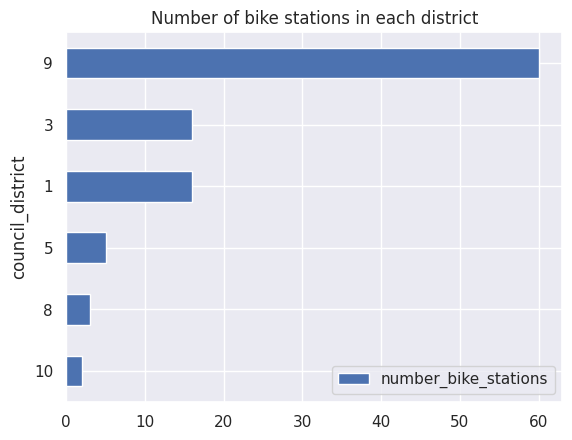

In [16]:
bike_stations_for_each_district_df.set_index('council_district').sort_values(by='number_bike_stations').plot.barh(title='Number of bike stations in each district');

## Subscriber Type

Looks like it is a category for the type of user.

In [17]:
%%bigquery
SELECT DISTINCT subscriber_type
FROM bigquery-public-data.austin_bikeshare.bikeshare_trips

Downloading:   0%|          | 0/77 [00:00<?, ?rows/s]

Downloading: 100%|██████████| 77/77 [00:01<00:00, 54.36rows/s]


,subscriber_type
0,Annual Membership (Austin B-cycle)
1,Walk Up
2,24-Hour Kiosk (Austin B-cycle)
3,Founding Member (Austin B-cycle)
4,Local365
...,...
72,PROHIBITED
73,RESTRICTED
74,Annual (Omaha B-cycle)
75,Local365 Youth (age 13-17 riders)- 1/2 off Spe...


In [18]:
%%bigquery subscriber_type_num_df
SELECT subscriber_type, COUNT(*) AS num_trips
FROM bigquery-public-data.austin_bikeshare.bikeshare_trips
GROUP BY subscriber_type
ORDER BY num_trips DESC
LIMIT 20

Downloading: 100%|██████████| 20/20 [00:01<00:00, 12.31rows/s]


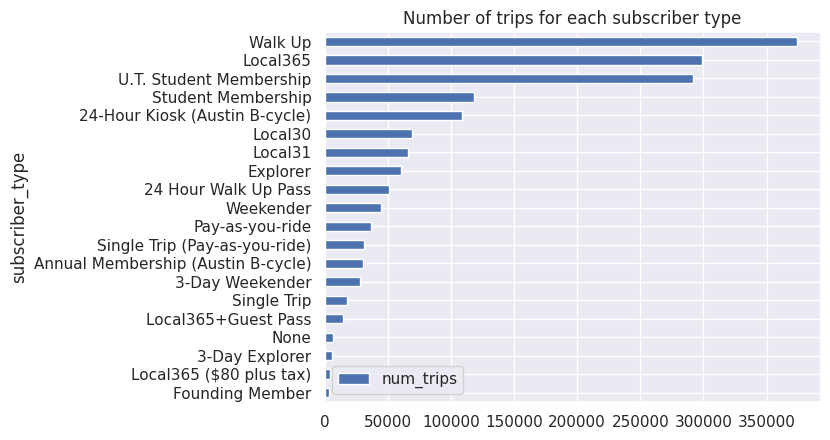

In [19]:
subscriber_type_num_df.set_index('subscriber_type').sort_values(by='num_trips').plot.barh(title='Number of trips for each subscriber type');

## Properties of Stations

In [20]:
%%bigquery property_type_stations_df
SELECT property_type, COUNT(*) AS num_stations
FROM bigquery-public-data.austin_bikeshare.bikeshare_stations
GROUP BY property_type, status
HAVING status = 'active'
ORDER BY num_stations DESC

Downloading:   0%|          | 0/5 [00:00<?, ?rows/s]

Downloading: 100%|██████████| 5/5 [00:01<00:00,  3.49rows/s]


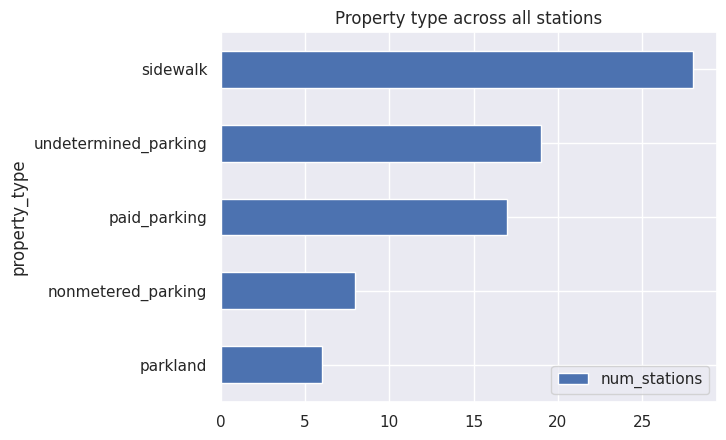

In [21]:
property_type_stations_df.set_index('property_type').sort_values(by='num_stations').plot.barh(title='Property type across all stations');

In [22]:
%%bigquery number_of_docks_df
SELECT name, number_of_docks
FROM bigquery-public-data.austin_bikeshare.bikeshare_stations
WHERE status = 'active'
ORDER BY number_of_docks DESC
LIMIT 10

Downloading:   0%|          | 0/10 [00:00<?, ?rows/s]

Downloading: 100%|██████████| 10/10 [00:01<00:00,  7.42rows/s]


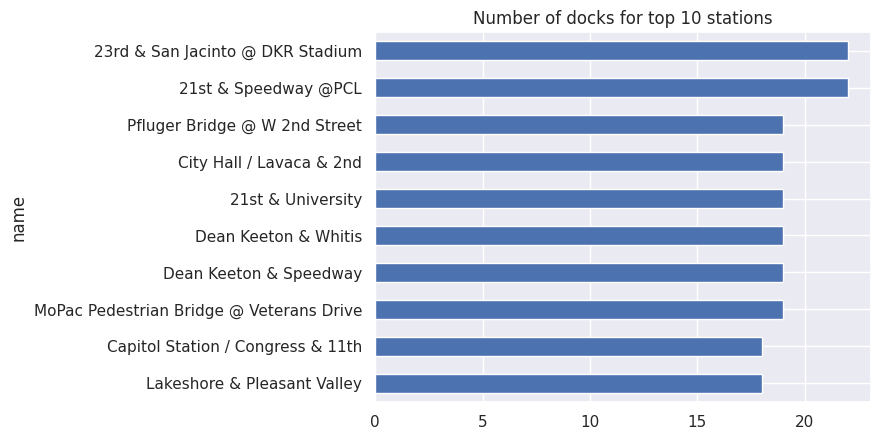

In [23]:
number_of_docks_df.set_index('name').sort_values(by='number_of_docks').plot.barh(title='Number of docks for top 10 stations', legend=False);

## Most Frequent Stations

In [24]:
%%bigquery start_station_trips_df
SELECT start_station_id, start_station_name, COUNT(*) AS num_trips
FROM bigquery-public-data.austin_bikeshare.bikeshare_trips
GROUP BY start_station_name, start_station_id
ORDER BY num_trips DESC
LIMIT 8

Downloading: 100%|██████████| 8/8 [00:01<00:00,  4.62rows/s]


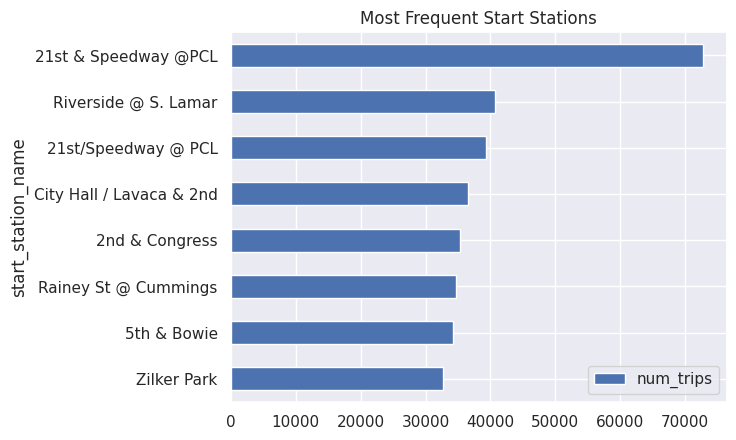

In [25]:
start_station_trips_df.drop(columns='start_station_id').set_index('start_station_name').sort_values(by='num_trips').plot.barh(title='Most Frequent Start Stations');

In [26]:
%%bigquery end_station_trips_df
SELECT end_station_name, COUNT(*) AS num_trips
FROM bigquery-public-data.austin_bikeshare.bikeshare_trips
GROUP BY end_station_name
ORDER BY num_trips DESC
LIMIT 8

Downloading:   0%|          | 0/8 [00:00<?, ?rows/s]

Downloading: 100%|██████████| 8/8 [00:01<00:00,  5.43rows/s]


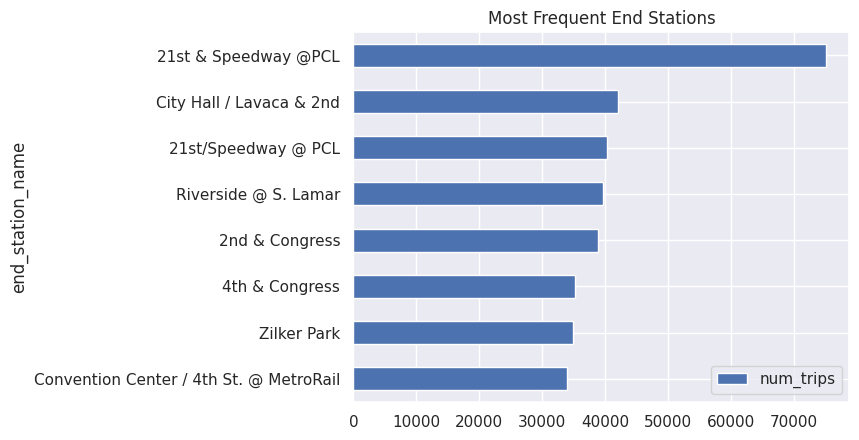

In [27]:
end_station_trips_df.set_index('end_station_name').sort_values(by='num_trips').plot.barh(title='Most Frequent End Stations');

In [28]:
%%bigquery start_end_station_trips_df
SELECT start_station_name, end_station_name, COUNT(*) AS num_trips
FROM bigquery-public-data.austin_bikeshare.bikeshare_trips
GROUP BY start_station_name, end_station_name
ORDER BY num_trips DESC
LIMIT 8

Downloading: 100%|██████████| 8/8 [00:01<00:00,  6.16rows/s]


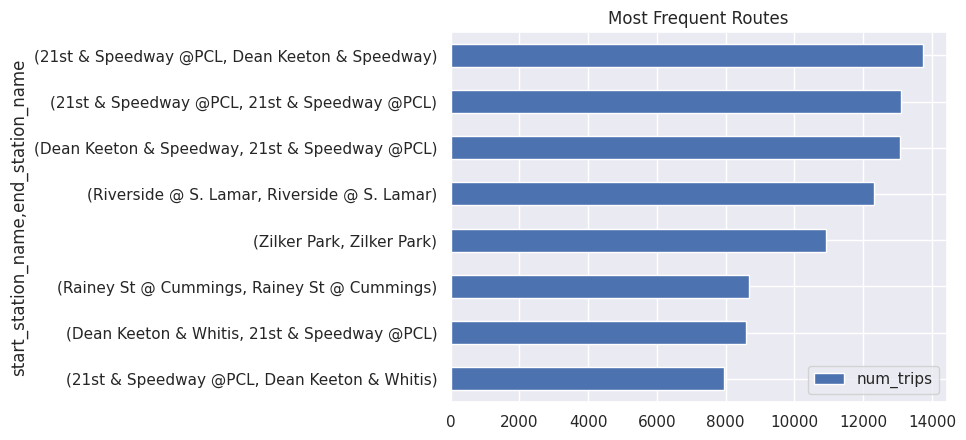

In [29]:
start_end_station_trips_df.set_index(['start_station_name', 'end_station_name']).sort_values(by='num_trips').plot.barh(title='Most Frequent Routes');

## Joining the two tables together

In [30]:
%%bigquery
SELECT trips.*,
start_stations.property_type AS start_station_property_type,
start_stations.number_of_docks AS start_station_number_of_docks,
start_stations.council_district AS start_station_council_district,
end_stations.property_type AS end_station_property_type,
end_stations.number_of_docks AS end_station_number_of_docks,
end_stations.council_district AS end_station_council_district,
FROM (
    SELECT *
    FROM bigquery-public-data.austin_bikeshare.bikeshare_trips
    WHERE NOT (end_station_id = 'Event')
    ) trips
INNER JOIN bigquery-public-data.austin_bikeshare.bikeshare_stations start_stations
ON trips.start_station_id = start_stations.station_id
INNER JOIN bigquery-public-data.austin_bikeshare.bikeshare_stations end_stations
ON CAST(trips.end_station_id AS INT) = end_stations.station_id

Downloading: 100%|██████████| 1614447/1614447 [00:16<00:00, 100225.99rows/s]


,trip_id,subscriber_type,bikeid,start_time,start_station_id,start_station_name,end_station_id,end_station_name,duration_minutes,start_station_property_type,start_station_number_of_docks,start_station_council_district,end_station_property_type,end_station_number_of_docks,end_station_council_district
0,9900285908,Annual Membership (Austin B-cycle),400,2014-10-26 14:12:00+00:00,2823,Capital Metro HQ - East 5th at Broadway,2544,East 6th & Pedernales St.,10,undetermined_parking,13,3,undetermined_parking,11,3
1,9900289692,Walk Up,248,2015-10-02 21:12:01+00:00,1006,Zilker Park West,1008,Nueces @ 3rd,39,None,<NA>,8,None,<NA>,9
2,9900285987,24-Hour Kiosk (Austin B-cycle),446,2014-10-26 15:12:00+00:00,2712,Toomey Rd @ South Lamar,2712,Toomey Rd @ South Lamar,31,None,<NA>,5,None,<NA>,5
3,9900285989,24-Hour Kiosk (Austin B-cycle),203,2014-10-26 15:12:00+00:00,2712,Toomey Rd @ South Lamar,2712,Toomey Rd @ South Lamar,31,None,<NA>,5,None,<NA>,5
4,9900285991,24-Hour Kiosk (Austin B-cycle),101,2014-10-26 15:12:00+00:00,2712,Toomey Rd @ South Lamar,2712,Toomey Rd @ South Lamar,30,None,<NA>,5,None,<NA>,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1614442,23557062,Local31,19254,2021-02-27 14:20:08+00:00,3838,26th/Nueces,4062,Lakeshore/Pleasant Valley,28,undetermined_parking,13,9,nonmetered_parking,18,3
1614443,25272634,Local31,19453,2021-09-29 15:03:38+00:00,3838,26th/Nueces,4062,Lakeshore/Pleasant Valley,62,undetermined_parking,13,9,nonmetered_parking,18,3
1614444,25179337,Student Membership,21829,2021-09-19 09:16:12+00:00,3838,26th/Nueces,4062,Lakeshore/Pleasant Valley,22,undetermined_parking,13,9,nonmetered_parking,18,3
1614445,25150008,Local31,21859,2021-09-16 15:34:42+00:00,3838,26th/Nueces,4062,Lakeshore/Pleasant Valley,34,undetermined_parking,13,9,nonmetered_parking,18,3


In [31]:
%%bigquery trips_per_month_df
SELECT trips.month, COUNT(*) AS number_of_trips_per_month
FROM (
    SELECT *, EXTRACT(MONTH FROM start_time) AS month,
    EXTRACT(DAYOFWEEK FROM start_time) AS day_of_week,
    EXTRACT(HOUR FROM start_time) AS hour,
    (EXTRACT(DAYOFWEEK FROM start_time)<2 OR EXTRACT(DAYOFWEEK FROM start_time)>6) AS is_weekend
    FROM bigquery-public-data.austin_bikeshare.bikeshare_trips) trips
GROUP BY trips.month
ORDER BY trips.month

Downloading:   0%|          | 0/12 [00:00<?, ?rows/s]

Downloading: 100%|██████████| 12/12 [00:01<00:00,  8.61rows/s]


## Number of trips per month, day, hour

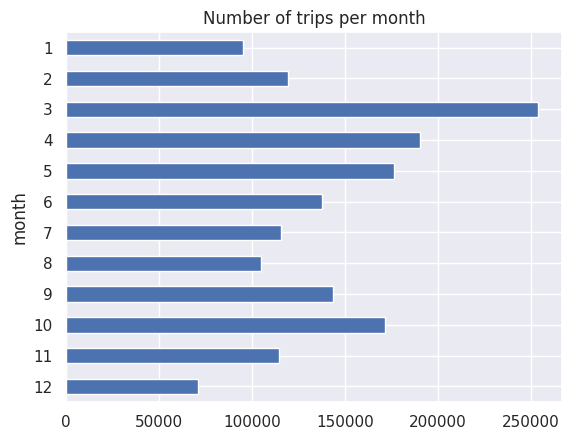

In [32]:
trips_per_month_df.set_index('month').sort_index(ascending=False).plot.barh(title='Number of trips per month', legend=False);

In [33]:
%%bigquery trips_per_day_df
SELECT trips.day_of_week, COUNT(*) AS number_of_trips_per_day
FROM (
    SELECT start_time, EXTRACT(DAYOFWEEK FROM start_time) AS day_of_week,
    FROM bigquery-public-data.austin_bikeshare.bikeshare_trips) trips
GROUP BY trips.day_of_week
ORDER BY trips.day_of_week    

Downloading: 100%|██████████| 7/7 [00:01<00:00,  4.97rows/s]


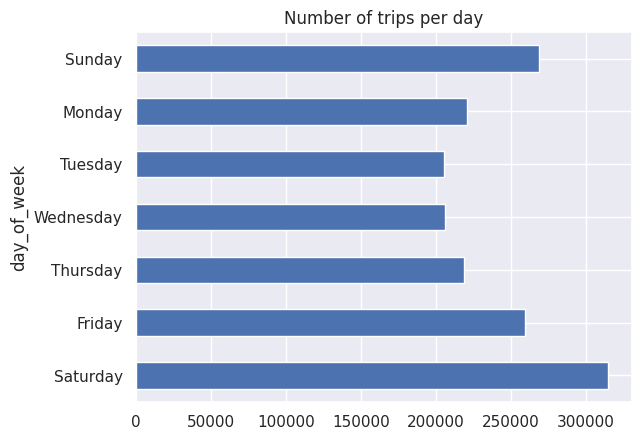

In [34]:
(trips_per_day_df.sort_values(by='day_of_week', ascending=False)
    .assign(day_of_week = trips_per_day_df.day_of_week.astype('str')
            .replace({'1': 'Sunday', '2': 'Monday', '3': 'Tuesday',
                '4': 'Wednesday', '5': 'Thursday', '6': 'Friday', '7': 'Saturday'}))
    .set_index('day_of_week')
).plot.barh(title='Number of trips per day', legend=False);

In [35]:
%%bigquery trips_per_hour_weekend_df
SELECT trips.hour, COUNT(*) AS num_trips_per_hour
FROM (
    SELECT start_time, 
    EXTRACT(HOUR FROM start_time) AS hour,
    (EXTRACT(DAYOFWEEK FROM start_time)<2 OR EXTRACT(DAYOFWEEK FROM start_time)>6) AS is_weekend
    FROM bigquery-public-data.austin_bikeshare.bikeshare_trips
    WHERE (EXTRACT(DAYOFWEEK FROM start_time)<2 OR EXTRACT(DAYOFWEEK FROM start_time)>6)) trips
GROUP BY trips.hour
ORDER BY trips.hour

Downloading: 100%|██████████| 24/24 [00:01<00:00, 16.43rows/s]


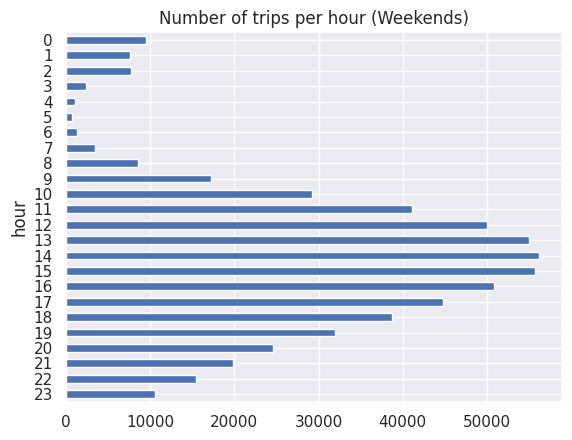

In [36]:
trips_per_hour_weekend_df.set_index('hour').sort_index(ascending=False).plot.barh(title='Number of trips per hour (Weekends)', legend=False);

In [37]:
%%bigquery trips_per_hour_weekday_df
SELECT trips.hour, COUNT(*) AS num_trips_per_hour
FROM (
    SELECT start_time, 
    EXTRACT(HOUR FROM start_time) AS hour,
    (EXTRACT(DAYOFWEEK FROM start_time)<2 OR EXTRACT(DAYOFWEEK FROM start_time)>6) AS is_weekend
    FROM bigquery-public-data.austin_bikeshare.bikeshare_trips
    WHERE NOT (EXTRACT(DAYOFWEEK FROM start_time)<2 OR EXTRACT(DAYOFWEEK FROM start_time)>6)) trips
GROUP BY trips.hour
ORDER BY trips.hour

Downloading: 100%|██████████| 24/24 [00:01<00:00, 16.89rows/s]


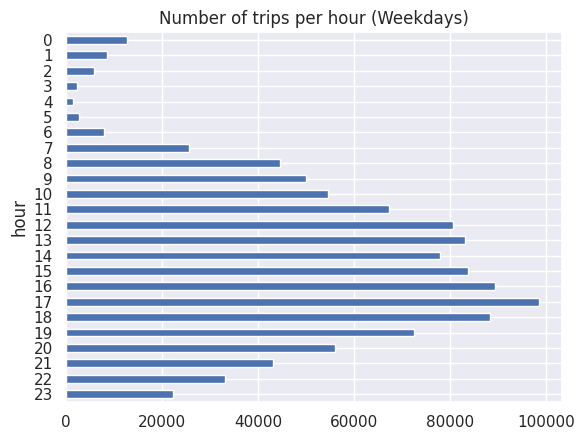

In [38]:
trips_per_hour_weekday_df.set_index('hour').sort_index(ascending=False).plot.barh(title='Number of trips per hour (Weekdays)', legend=False);